### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
#           'Spain': 'yellow',
#           'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Iran,China,Peru
2021-06-05,346759,3721736,597377,472531,228758,128099,126472,121365,110135,89228,80941,4846,186073
2021-06-06,349186,3728885,597628,473404,228804,128103,126523,121711,110160,89249,81063,4846,186073
2021-06-07,351309,3736961,597952,474414,228838,128104,126588,122037,110224,89390,81183,4846,186511
2021-06-08,353528,3747371,598332,476792,229100,128118,126690,122409,110299,89497,81362,4846,186757
2021-06-09,355705,3757791,598764,479515,229353,128124,126767,122802,110364,89592,81519,4846,187157


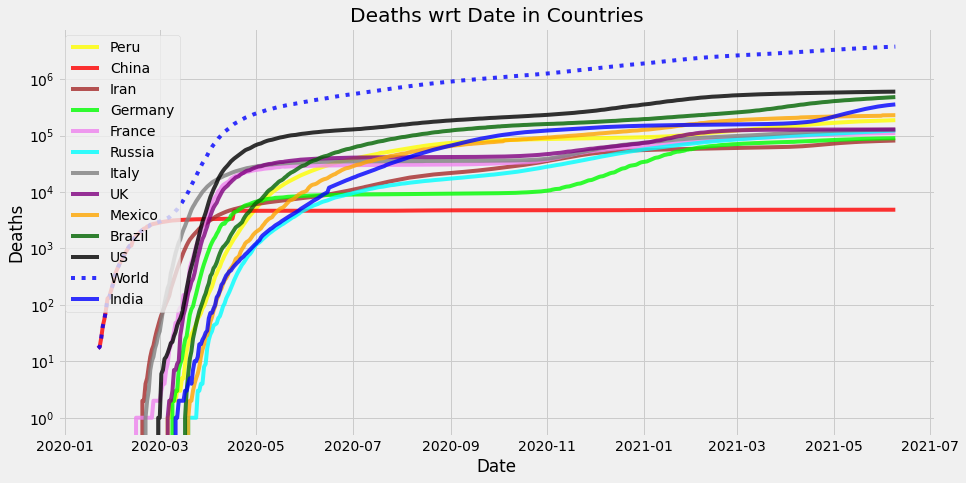

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Iran,China,Peru
2021-06-05,114460,398361,13908,66017,2071,5655,2434,9011,6654,2249,6442,31,4225
2021-06-06,100636,322641,5395,39637,1979,5225,2275,9025,5070,1964,5612,26,0
2021-06-07,86498,320618,15496,37156,881,5597,1270,9297,1174,1444,4907,40,3179
2021-06-08,92596,368310,15150,52911,3449,5973,1894,9843,6021,2253,8846,19,1429
2021-06-09,93463,420967,20779,85748,3855,7322,2198,10271,5569,3275,10598,26,2934


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Iran,China,Peru
2021-06-05,209522,541248,25119,63667,2668,3279,4985,8704,3909,6909,11638,20,5162
2021-06-06,202263,526674,23804,62065,2622,3408,4804,8725,3987,6579,11236,21,4818
2021-06-07,194545,512937,23250,60404,2506,3554,4569,8763,3799,6237,10814,22,4709
2021-06-08,187749,503295,22710,59904,2569,3715,4390,8835,3947,5971,10683,22,4490
2021-06-09,181463,497806,22581,61627,2654,3956,4244,8931,4055,5791,10677,22,4386


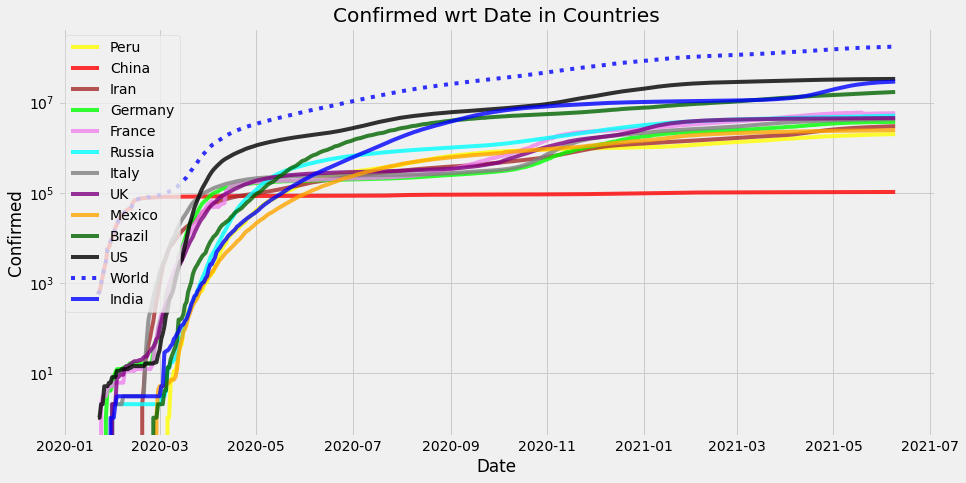

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Iran,China,Peru
2021-06-05,2677,9167,376,1689,190,13,57,391,57,76,128,0,260
2021-06-06,2427,7149,251,873,46,4,51,346,25,21,122,0,0
2021-06-07,2123,8076,324,1010,34,1,65,326,64,141,120,0,438
2021-06-08,2219,10410,380,2378,262,14,102,372,75,107,179,0,246
2021-06-09,2177,10420,432,2723,253,6,77,393,65,95,157,0,400


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Iran,China,Peru
2021-06-05,3304.39,11150.14,518.36,1806.08,517.81,9.43,97.89,374.27,106.14,134.12,186.53,0.0,452.38
2021-06-06,3194.72,10650.00,484.94,1689.45,458.84,8.75,92.02,370.74,96.00,119.98,178.46,0.0,395.83
2021-06-07,3060.75,10328.25,464.83,1604.51,405.73,7.78,88.65,365.14,92.00,122.61,171.15,0.0,401.10
2021-06-08,2955.53,10338.47,454.22,1701.20,387.77,8.56,90.32,366.00,89.87,120.65,172.13,0.0,381.72
2021-06-09,2858.22,10348.66,451.44,1828.93,370.92,8.24,88.65,369.38,86.76,117.45,170.24,0.0,384.00


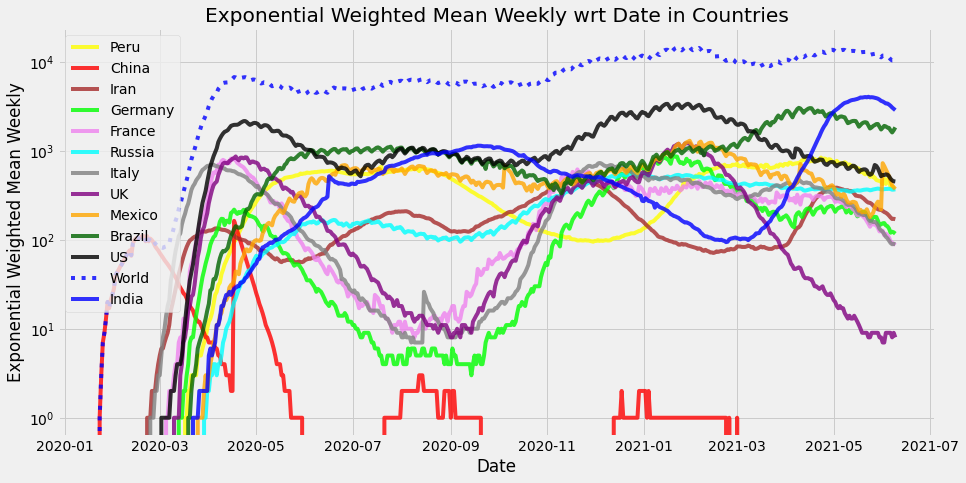

In [18]:
plotter(np.round(AVG), name)

### Stack Plots

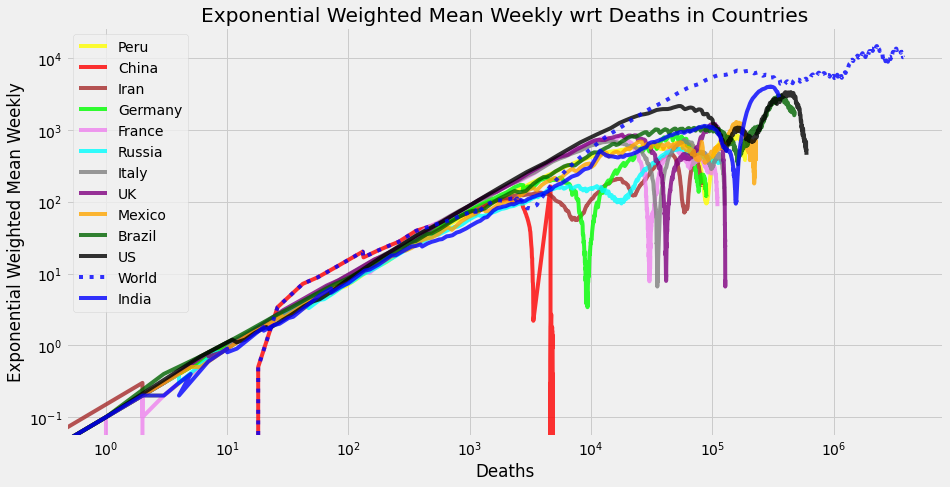

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

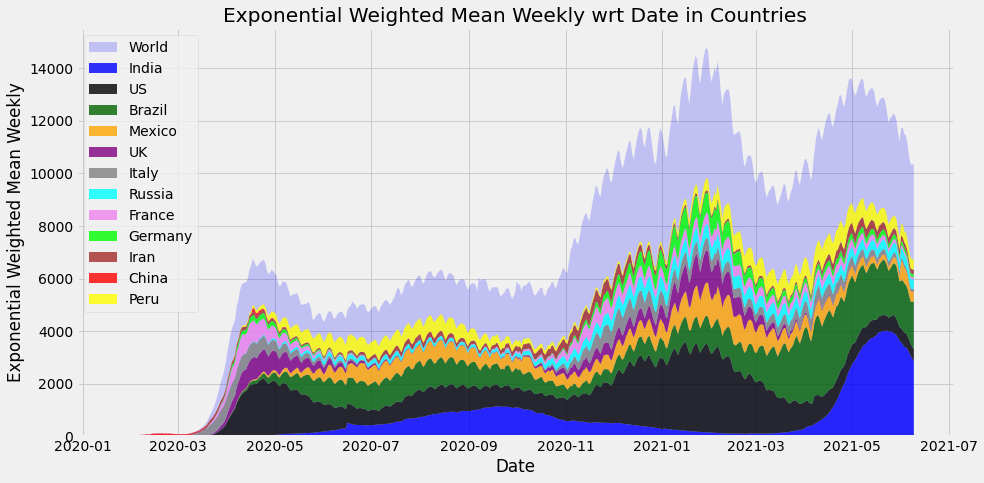

In [20]:
stackplotter(AVG, name)

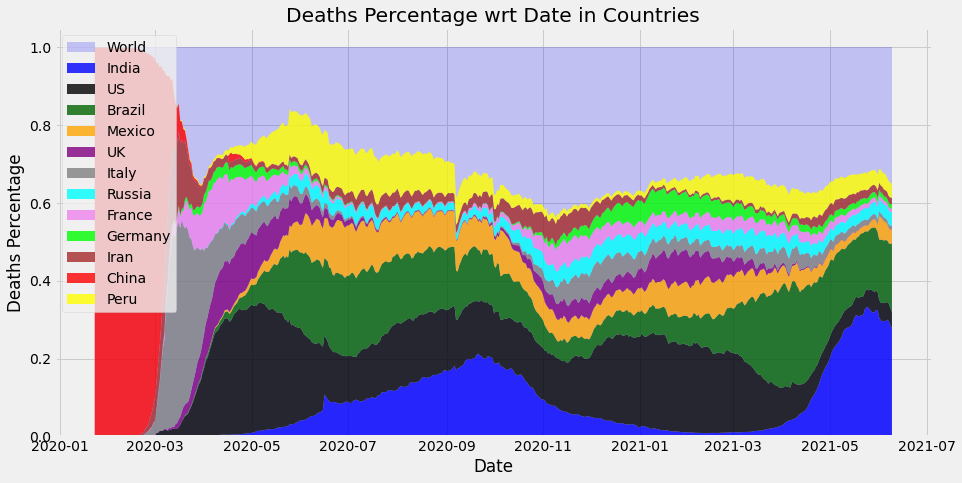

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

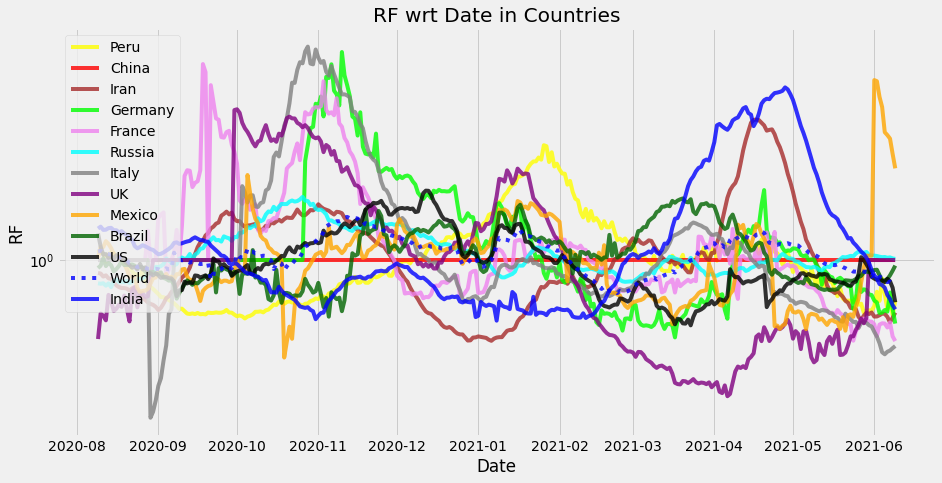

In [23]:
plotter(Reproductivity[200:], 'RF')

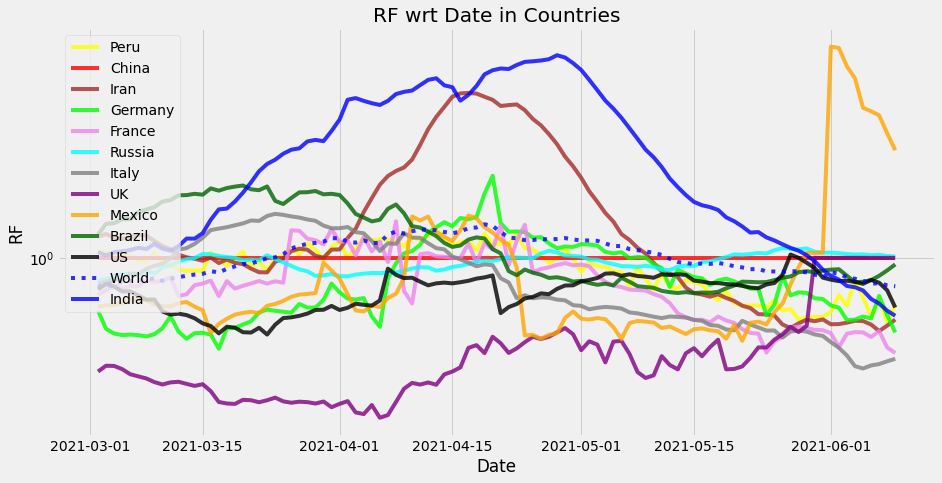

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

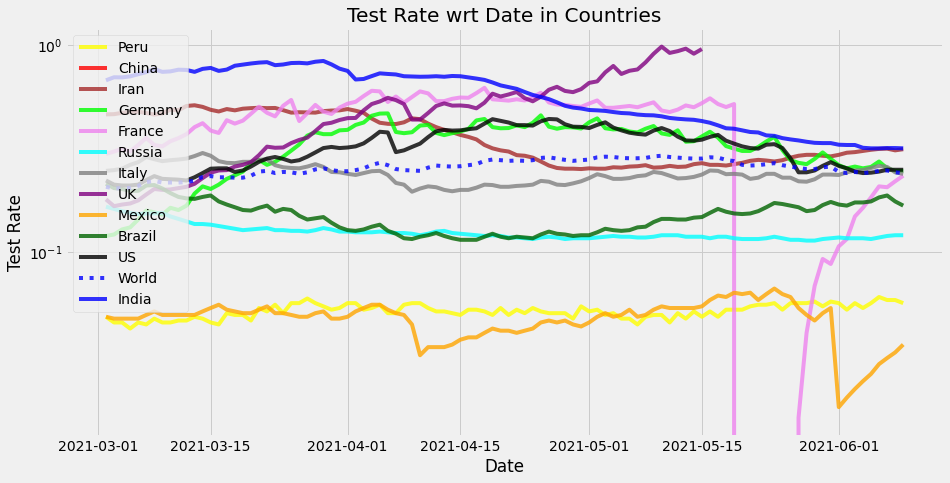

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

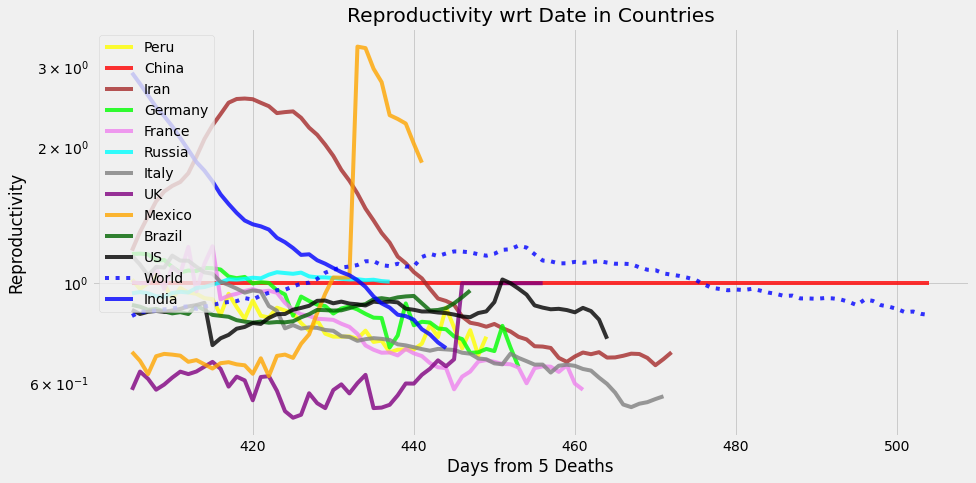

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

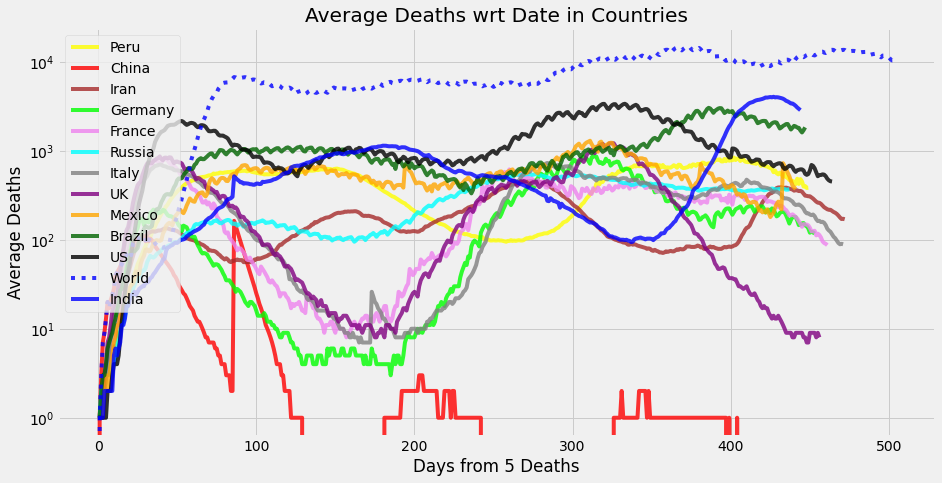

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

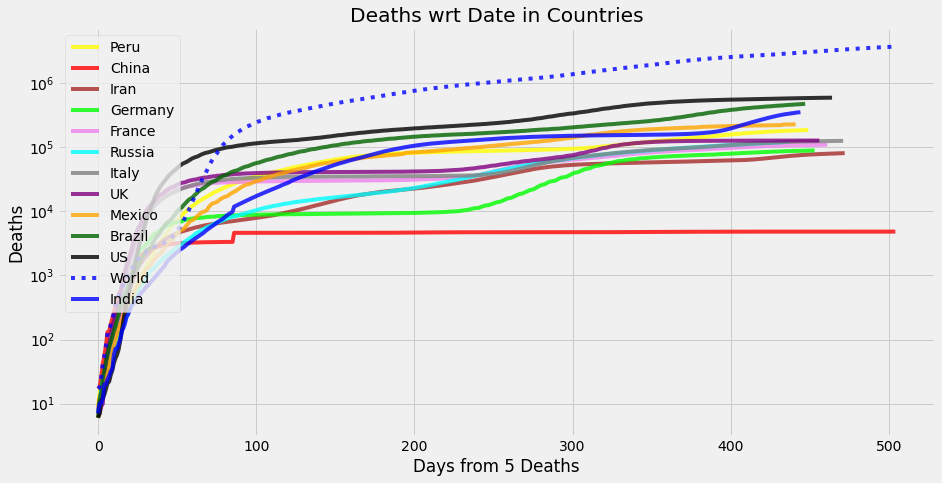

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3757791,10420,9438.57,10348.66,0.8506,174420543,0.241,497806,751.56
US,598764,432,410.57,451.44,0.7537,33414025,0.250,22581,119.75
Brazil,479515,2723,1687.00,1828.93,0.9634,17122877,0.168,61627,95.90
India,355705,2177,2530.86,2858.22,0.7187,29182532,0.317,181463,71.14
Mexico,229353,253,172.43,370.92,1.8477,2441866,0.036,2654,45.87
Peru,187157,400,316.43,384.00,0.7617,1987933,0.057,4386,37.43
UK,128124,6,9.57,8.24,1.0000,4551694,NaN,3956,25.62
Italy,126767,77,69.14,88.65,0.5622,4237790,0.239,4244,25.35
Russia,122802,393,369.29,369.38,1.0077,5096657,0.121,8931,24.56


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,3757791,10420,9438.57,10348.66,0.8506,174420543,0.241,497806,751.56
India,355705,2177,2530.86,2858.22,0.7187,29182532,0.317,181463,71.14
Brazil,479515,2723,1687.00,1828.93,0.9634,17122877,0.168,61627,95.90
Argentina,83272,605,564.57,555.62,1.1679,4038528,0.250,27770,16.65
Colombia,93394,471,512.29,504.35,1.0365,3633481,0.213,21440,18.68
US,598764,432,410.57,451.44,0.7537,33414025,0.250,22581,119.75
Russia,122802,393,369.29,369.38,1.0077,5096657,0.121,8931,24.56
Peru,187157,400,316.43,384.00,0.7617,1987933,0.057,4386,37.43
Indonesia,52162,170,179.14,171.93,1.0843,1877050,0.166,5723,10.43


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  3757791


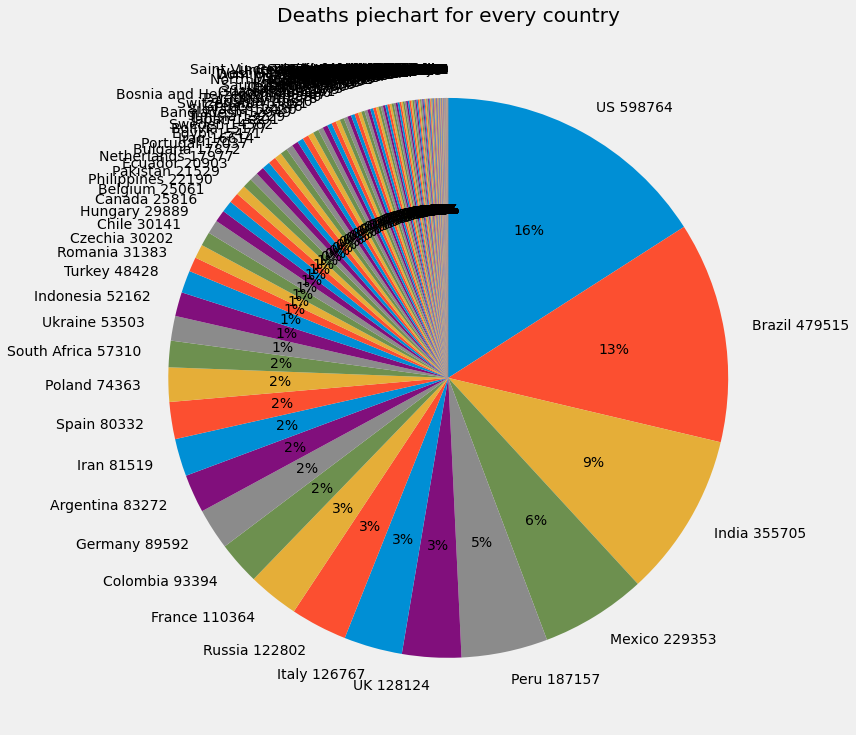

In [35]:
piechart('Deaths')

World total:  9438


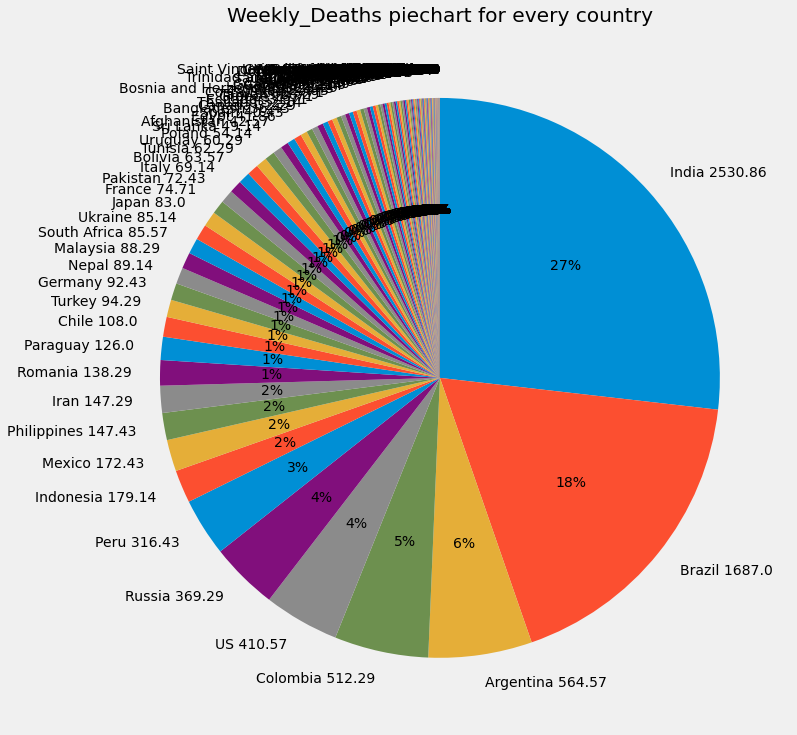

In [36]:
piechart('Weekly_Deaths')

World total:  10420


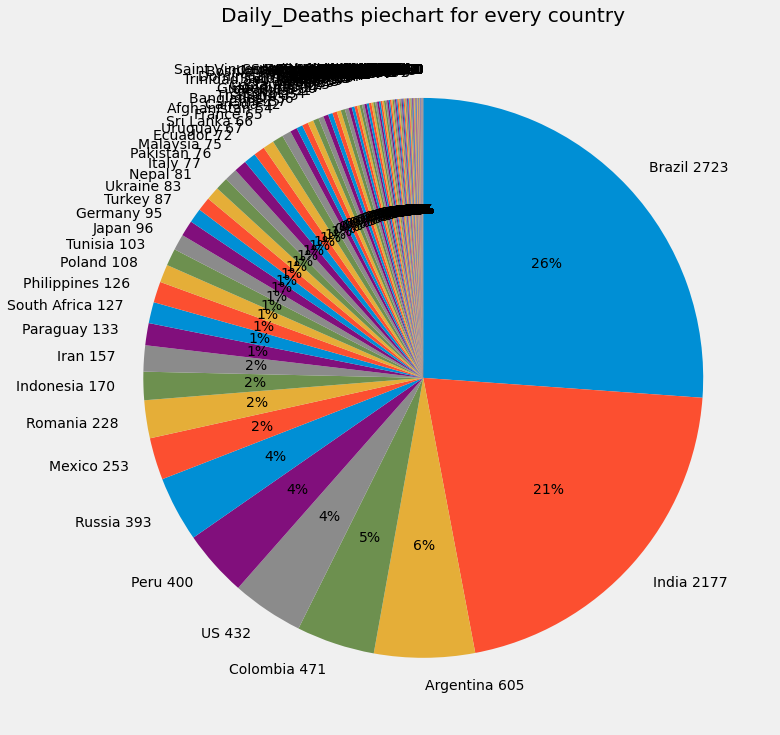

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-06-10


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

751558200.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 61d797e] `date` update
 1 file changed, 2058 insertions(+), 2050 deletions(-)
 rewrite Simplified Death Statistics SARS-COV2.ipynb (69%)


To https://github.com/Arrowheadahp/COVID-19.git
   f40fbad..61d797e  master -> master
